# TP Nº2: Introducción a Biopython

### Importamos librerias

In [1]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.0 MB/s eta 0:00:00


In [2]:

## importamos librerías
import matplotlib.pyplot as plt
import re
import numpy as np

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import six_frame_translations
from Bio import Entrez
from Bio import ExPASy
from Bio import SwissProt

from collections import Counter
from PIL import Image
import random

# Proteinas aleatorias

## Código que genera secuencias de proteínas al azar, de un largo preestablecido por el usuario.

In [3]:
aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'L', 'I', 'M', 'H', 'K']
probabilidades = [1/len(aminoacidos) for aminoacido in aminoacidos]

def proteina_azar(largo):
  secuencia = ''
  aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'L', 'I', 'M', 'H', 'K']
  probabilidades = [1/len(aminoacidos) for aminoacido in aminoacidos]

  for i in range(largo):
          secuencia = secuencia + random.choices(aminoacidos,probabilidades)[0]
  return (secuencia)


print( proteina_azar(10))


MYGELHPHVV


In [4]:
nucleotidos = ['A', 'C', 'G', 'T']
def adn_azar(largo):
  secuencia = ''
  nucleotidos = ['A', 'C', 'G', 'T']
  probabilidades = [0.25, 0.25, 0.25, 0.25]
  for i in range(largo):
          secuencia = secuencia + random.choices(nucleotidos,probabilidades)[0]
  return (secuencia)

print(adn_azar(12))

GGGTTGTGTGAG


## Frecuencias en Secuencias


### Determinamos la frecuencia de cada uno de los 20 aminoácidos para un set de secuencias de proteínas y para una secuencia de ADN, ambas al azar, a partir de los codones correspondientes.

In [5]:
def es_proteina(secuencia):
  secuencia = str(secuencia)
  return bool(re.search(r'[^ACGT]', secuencia))

# Le ingresa  una secuencia, si no es ADN lo codifica
def frecuencia(seq):
  # Convertir a Seq si no lo es
  if not isinstance(seq, Seq):
      seq = Seq(seq)

  # Me fijo si es proteina o ADN, poniendo como parametro si la cadena contiene letras distintas a ACGT
  if es_proteina(seq) == True:
    # Contar las ocurrencias de cada letra en la secuencia
    contador = Counter(seq)

    # Total de letras en la secuencia
    total_letras = len(seq)

    # Calcular la probabilidad de cada letra
    probabilidades = {letra: contador[letra] / total_letras for letra in contador}
  else:
    # Traduzco la secuencia a aminoacidos
    seq_proteina = seq.translate()
    return frecuencia(seq_proteina)

  return probabilidades

# Revisamos resultados para una secuencia generada al azar

secuencia_adn = adn_azar(1200)
# Llamada a la función para obtener las probabilidades
probabilidades_al_azar_adn = frecuencia(secuencia_adn)
# Imprimir el diccionario con las probabilidadesscipy.stats.chisquare
print(probabilidades_al_azar_adn)

#Lo mismo para secuencia de aminoacidos
secuencia_proteina = proteina_azar(400)
probabilidades_al_azar_proteina = frecuencia(secuencia_proteina)
print(probabilidades_al_azar_proteina)

{'L': 0.11, 'R': 0.0975, 'K': 0.045, 'P': 0.0625, 'A': 0.05, 'S': 0.09, 'T': 0.075, 'Y': 0.0275, 'C': 0.03, 'E': 0.0275, 'G': 0.0425, 'M': 0.02, 'F': 0.0325, 'N': 0.0275, 'Q': 0.0275, 'V': 0.0625, 'W': 0.0275, '*': 0.0525, 'D': 0.0275, 'I': 0.0375, 'H': 0.0275}
{'A': 0.05, 'M': 0.075, 'L': 0.0425, 'P': 0.0375, 'K': 0.0425, 'F': 0.0425, 'E': 0.055, 'H': 0.0725, 'Q': 0.04, 'I': 0.0525, 'D': 0.05, 'N': 0.0575, 'T': 0.0575, 'V': 0.0525, 'R': 0.0425, 'G': 0.065, 'Y': 0.0475, 'W': 0.045, 'S': 0.0475, 'C': 0.025}



 ### Mostramos los resultados del inciso anterior en un gráfico de barras.

<Figure size 640x480 with 0 Axes>

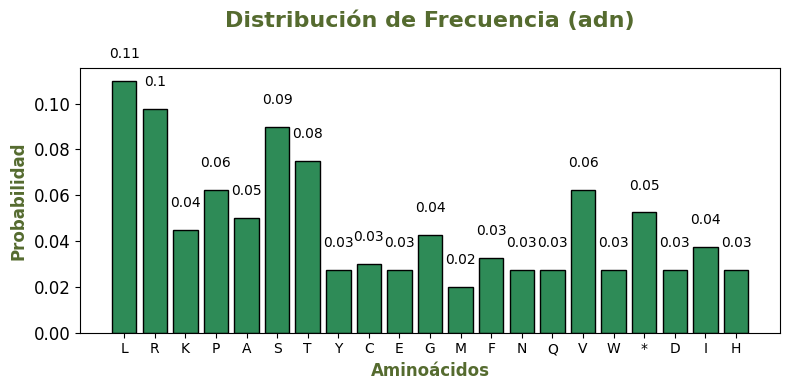

<Figure size 640x480 with 0 Axes>

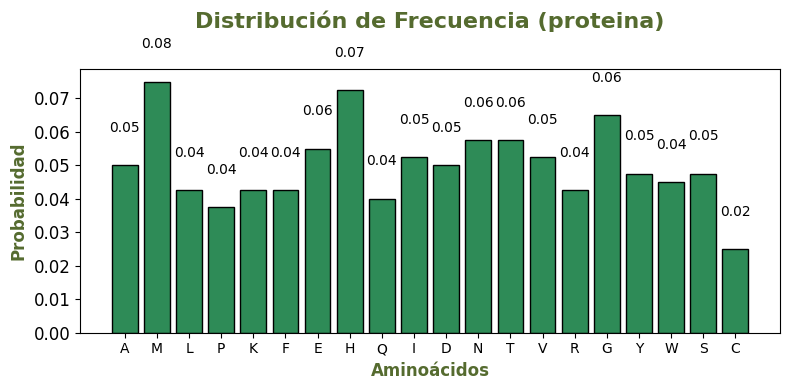

In [6]:
def graficar_frecuencia(diccionario, origen):
    # Letras (o aminoácidos)
    letras = list(diccionario.keys())
    # Valores de probabilidad
    probabilidades_valores = list(diccionario.values())

    # Crear el gráfico
    plt.figure(figsize=(8, 4))  # Ajustamos el tamaño de la figura
    bars = plt.bar(letras, probabilidades_valores, color='seagreen', edgecolor='black')

    # Título dinámico según el origen
    if origen:
        titulo = f'Distribución de Frecuencia ({origen})'
    else:
        titulo = 'Distribución de Frecuencia'

    # Añadir etiquetas y título con un estilo más atractivo
    plt.xlabel('Aminoácidos', fontsize=12, fontweight='bold', color='darkolivegreen')
    plt.ylabel('Probabilidad', fontsize=12, fontweight='bold', color='darkolivegreen')
    plt.title(titulo, fontsize=16, fontweight='bold',color='darkolivegreen', pad=30)
    plt.yticks(fontsize=12, color='black')

    # Agregar valores encima de las barras para mayor claridadscipy.stats.chisquare
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', fontsize=10, color='black')

    # Mejorar la presentación del gráfico
    plt.tight_layout()  # Ajusta automáticamente el espaciado

plt.figure()
graficar_frecuencia(probabilidades_al_azar_adn, "adn")
plt.show()
plt.close()

plt.figure()
graficar_frecuencia(probabilidades_al_azar_proteina, "proteina")
plt.show()
plt.close()

#Traducir y obtener ORF
Traducimos la secuencia por cada uno de los seis marcos de lectura(obteniendo una secuencia proteica por cada uno) y obtenemos la distribución de los
largos de los Marcos Abiertos de Lectura (ORF de Open Reading Frames).

In [7]:
#Definimos una funcion para obtener todos los marcos de lectura y medir los largos de los ORFs.
def obtener_marcos_abiertos_lectura(secuencia_adn):
  #Hay 6 marcos de lectura. Primero traducimos los 3 posibles de la secuencia input, adelantando 0,1 o 2
  #aminoacidos el comienzo de la lectura
      secuencia_c = secuencia_adn.reverse_complement()
      marco_1 = secuencia_adn.translate()
      marco_2 = secuencia_adn[1:].translate()
      marco_3 = secuencia_adn[2:].translate()
     #Hacemos lo mismo para la reversa complementaria
      marco_4 = secuencia_c.translate()
      marco_5 = secuencia_c[1:].translate()
      marco_6 = secuencia_c[2:].translate()
      #Lista con las 6 posibles traducciones
      marcos = [marco_1,marco_2,marco_3,marco_4, marco_5, marco_6]

      largos_ORF = []
      ORFS = []
      #Para cada marco me quedo con las secuencias entre codones stopscipy.stats.chisquare
      for marco in marcos: #Para cada marco
          largos_ORF_ = []
          ORFS_ = []
          lista_posibles_ORFs = marco.split("*") #Nos quedamos con las subsecuencias entre codones stop
          for posible_seq in lista_posibles_ORFs: #Para cada dicha subsecuencia     "                "
              if (len(posible_seq )>0): #No este vacia
                      largos_ORF_.append(len(posible_seq)) #Agregamos su largo a la lista de los largos de los ORF de ese marco
                      ORFS_.append(posible_seq) #Agregamos la secuencia de aminoacidos en si a la lista de secuencias de ORF de ese marco
          largos_ORF.append(largos_ORF_) #Agregamos ambas listas a una respectiva lista general, que tendra una lista (con los largos de los ORFs o los ORFs) por cada marco
          ORFS.append(ORFS_)
      return ORFS, largos_ORF

#Un ejemplo de output para una secuencia al azar
secuencia_azar = Seq(adn_azar(60000))
ORFs_a, largos_ORF_a = obtener_marcos_abiertos_lectura(secuencia_azar)
for i in range(len(largos_ORF_a)):
      print(f"Para el marco {i} hay {len(largos_ORF_a[i])} ORFs de largo promedio {np.average(largos_ORF_a[i]):.2f}")


Para el marco 0 hay 914 ORFs de largo promedio 20.84
Para el marco 1 hay 865 ORFs de largo promedio 22.07
Para el marco 2 hay 870 ORFs de largo promedio 21.94
Para el marco 3 hay 876 ORFs de largo promedio 21.77
Para el marco 4 hay 956 ORFs de largo promedio 19.86
Para el marco 5 hay 931 ORFs de largo promedio 20.41


/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# Definimos y llamamos una funcion que obtiene secuencias  de adn o proteina dados sus ids y la base de datos donde hacer la busqueda.


In [8]:
def obtener_secuencias(lista, bd):
  # Armo el diccionario de salida
  secuencias = []

  # Configura tu correo electrónico (recomendado por NCBI para acceder a su API)
  Entrez.email = "solernadina@gmail.com"

  for i in range(len(lista)):
    try:
      # Realizar una búsqueda en la base de datos de proteínas de NCBI
      handle = Entrez.efetch(db=bd, id= lista[i], rettype="gb", retmode="text")

      # Leer la respuesta y convertirla en un objeto Secuencia (Bio.SeqRecord)
      record = SeqIO.read(handle, "genbank")

      secuencias.append(record.seq)

      # Cerrar el archivo de respuesta
      handle.close()
    except Exception as e:
            # Si ocurre un error (como un identificador inválido), que no haga nada
            pass

  return secuencias


# 4 Comparacion de distribuciones

## 4 a) Compare Distribución de aminoácidos de secuencia de proteínas al azar vs. secuencias de proteínas reales.

Obtenemos la secuencia real

In [9]:
# Obtenemos la secuencia de proteina real

Entrez.email = "solernadina@gmail.com"  # Tu correo (importante para NCBI)
# Descargar desde la base de datos de proteínas
handle = Entrez.efetch(db="protein", id="AWJ68149.1", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

proteina_real = record.seq


Generamos una secuencia de proteina al azar con el mismo largo que la secuencia obtenida

In [10]:
# Obtenemos la secuencia de proteina al azar
proteina_autogenerada = proteina_azar(len(proteina_real))

Realizamos ambos graficos de distribucion

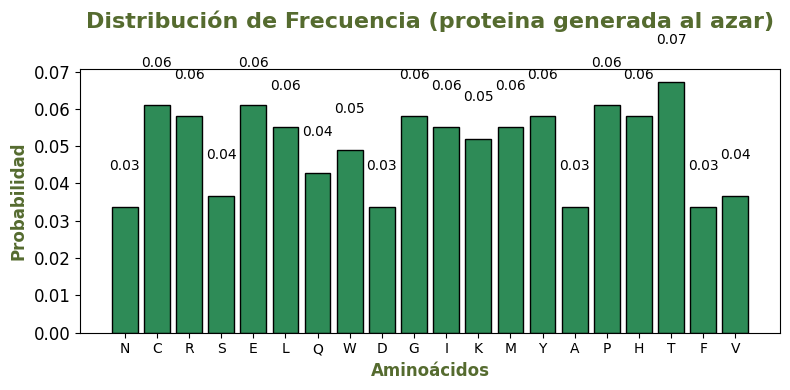

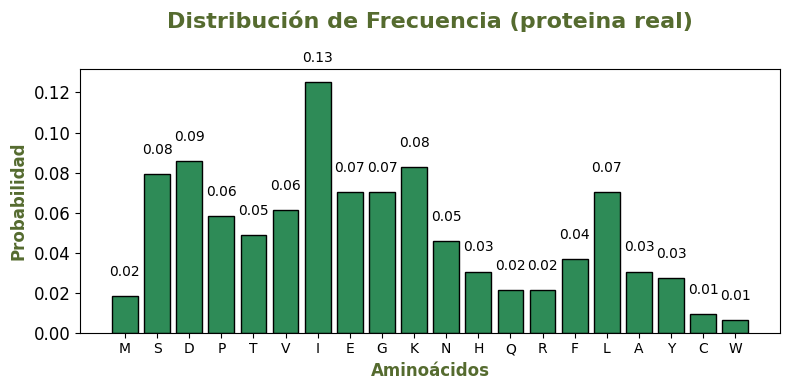

In [11]:
# Llamada a la función para obtener las probabilidades
probabilidades_proteina_autogenerada = frecuencia(proteina_autogenerada)
probabilidades_proteina_real = frecuencia(proteina_real)


graficar_frecuencia(probabilidades_proteina_autogenerada, "proteina generada al azar")
graficar_frecuencia(probabilidades_proteina_real, "proteina real")

Realicemos una frecuencia superpuesta para poder ver claras las diferencias

In [12]:
def graficar_frecuencias_superpuestas(dic1, dic2, label1="Distribución 1", label2="Distribución 2", titulo="Distribución Comparada"):
    # Asegurarse de tener las mismas claves en el mismo orden
    letras = sorted(set(dic1.keys()) | set(dic2.keys()))

    val1 = [dic1.get(letra, 0) for letra in letras]
    val2 = [dic2.get(letra, 0) for letra in letras]

    x = np.arange(len(letras))
    bar_width = 0.4

    plt.figure(figsize=(10, 5))
    plt.bar(x, val1, width=bar_width, color='royalblue', label=label1, alpha=0.7)
    plt.bar(x, val2, width=bar_width, color='orangered', label=label2, alpha=0.5)

    plt.xticks(x, letras)
    plt.xlabel("Aminoácidos", fontsize=12, fontweight='bold')
    plt.ylabel("Probabilidad", fontsize=12, fontweight='bold')
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()



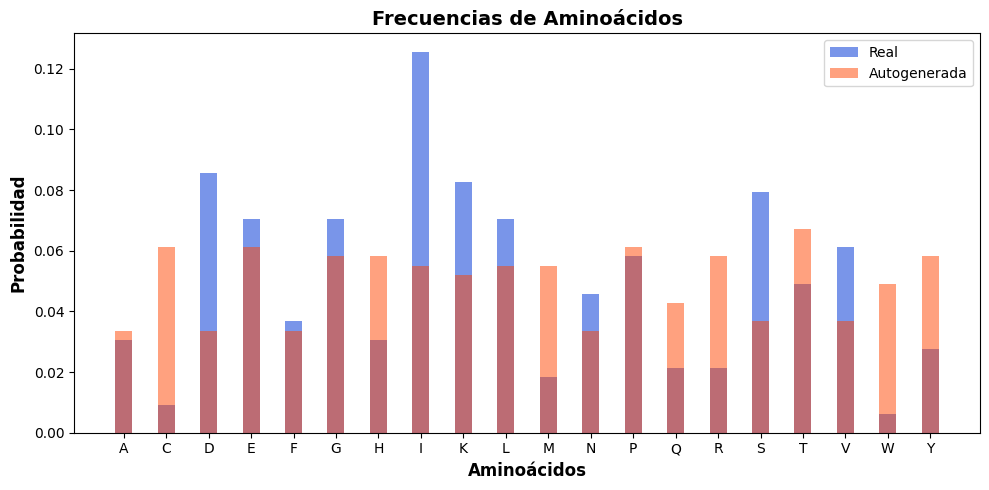

In [13]:
graficar_frecuencias_superpuestas(probabilidades_proteina_real, probabilidades_proteina_autogenerada, label1="Real", label2="Autogenerada", titulo="Frecuencias de Aminoácidos")


### Conclusiones de estos graficos
Vemos en primera instancia que la distribucion en proteinas reales no es uniforme, teniendo ciertos aminoacidos mayor frecuencia. Esto permite identificar aminoacidos clave (por ejemplo, leucina, alanina, glicina, serina, etc.), y aminoacidos raros o de menor frecuencia, como triptofano (W) o cisteína (C).

En cuanto a la secuencia autogenerada, muestra frecuencias más uniformes, lo que refleja la falta de restricciones biológicas o funcionales.

Esto refuerza la idea de que las proteínas no son cadenas al azar de aminoácidos, sino que tienen una composición cuidadosamente seleccionada para cumplir funciones específicas.

# 4 b) Analice cómo cambian las distribuciones al aumentar el tamaño de la secuencia “al azar” analizada, y al incrementar el número de secuencias reales analizadas. ¿Cuándo es suficiente?

##Vamos a analizar como cambian las distribuciones de aminoacidos tanto para proteinas reales como para proteinas reales variando los largos
###Trabajaremos con la familia de globinas humanas

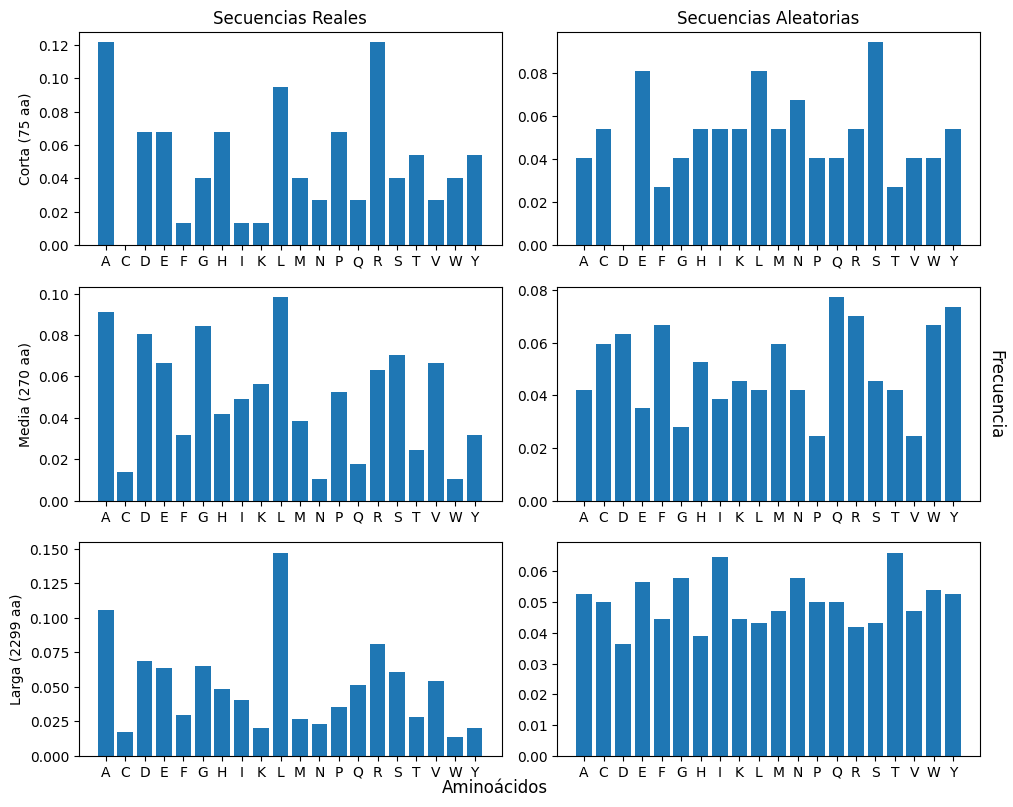

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fasta_path = "globin_full_sequences (2).fasta"

# Leer secuencias
globinas = []
for record in SeqIO.parse(fasta_path, "fasta"):
    globinas.append(str(record.seq))

globinas = list(set(globinas))

for glob in globinas:
    if len(glob) <80:
        globina_corta = glob
    elif 200 < len(glob) and len(glob) < 300:
        globina_media = glob
    elif 700 < len(glob):
        globina_larga = glob

prot_azar_corta = proteina_azar(len(globina_corta))
prot_azar_media = proteina_azar(len(globina_media))
prot_azar_larga = proteina_azar(len(globina_larga))

def frecuencias_ordenadas(proteina):
    contador  = dict(Counter(proteina)) #Contamos Aparciciones de Aminoacidos
    probabilidades = {letra: contador[letra] / len(proteina) for letra in list(contador.keys())} #Convertimos en frecuencias

    for aa in list(probabilidades.keys()):  # Eliminamos aminoacidos invalidos
      if aa not in aminoacidos:
         probabilidades.pop(aa)

    for aa in aminoacidos:     # Agregamos aminoacidos ausentes en la proteina
      if aa not in probabilidades.keys():
        probabilidades[aa] = 0

    prob_ordenadas = sorted(probabilidades.items())
    frecuencias = [aa[1] for aa in prob_ordenadas]

    return frecuencias

fr_corta_real = frecuencias_ordenadas(globina_corta)
fr_media_real = frecuencias_ordenadas(globina_media)
fr_larga_real = frecuencias_ordenadas(globina_larga)

fr_corta_azar = frecuencias_ordenadas(prot_azar_corta)
fr_media_azar = frecuencias_ordenadas(prot_azar_media)
fr_larga_azar = frecuencias_ordenadas(prot_azar_larga)

# Crear figura y ejes
fig, axs = plt.subplots(3, 2, figsize=(10, 8))  # 3 filas, 2 columnas
aa_ordenados = sorted(aminoacidos)

# Graficar en el primer subplot
axs[0,0].bar(aa_ordenados, fr_corta_real)
axs[1,0].bar(aa_ordenados, fr_media_real)
axs[2,0].bar(aa_ordenados, fr_larga_real)

axs[0,1].bar(aa_ordenados, fr_corta_azar)
axs[1,1].bar(aa_ordenados, fr_media_azar)
axs[2,1].bar(aa_ordenados, fr_larga_azar)

axs[0,0].set_title("Secuencias Reales")
axs[0,1].set_title("Secuencias Aleatorias")

axs[0,0].set_ylabel("Corta (75 aa)")
axs[1,0].set_ylabel("Media (270 aa)")
axs[2,0].set_ylabel("Larga (2299 aa)")

fig.text(0.5, 0.002, 'Aminoácidos', ha='center', fontsize=12)   # Eje X
fig.text(1, 0.5, 'Frecuencia', va='center', ha='center',rotation= 270, fontsize=12)  # Eje Y

plt.tight_layout()
plt.show()


# 4C y 4D) Elija una métrica que permita comparar dos distribuciones. (p.ej., RMSE). Escriba un código que dadas dos distribuciones las compare y obtenga la métrica correspondiente.

Elegimos el test de chi cuadrado para comparar distribuciones.
Para mostrar como funciona:
- Primero tomamos como distribucion real de aminoacidos a la obtenida en nuestro archivo de globinas.
- Luego realizamos el test de chi cuadrado o medimos el error cuadratico medio: por un lado un conjunto de secuencias aleatorias de aminoacidos y por el otro un subconjunto de las globinas; ambas respecto la distribucion de referencia.
- Finalmente marcamos un umbral que permita separar las reales de las aleatorias.

### Codigo que compara dos distribuciones, calculando el ECM o el p valor del test chi cuadrado

In [29]:
def metrica(dist_a, dist_b, metrica: str):
  assert metrica in ["ECM", "CHI"],  "Metrica no valida"

  if metrica == "ECM":
    resultado = np.linalg.norm(dif_listas(dist_a, dist_b))
  elif metrica == "CHI":
    resultado = chisquare( f_obs = dist_a, f_exp= dist_b )
    resultado = resultado.pvalue

  return resultado


## Test de Chi Cuadrado

In [30]:
random.seed(3)
from collections import Counter
from scipy.stats import chisquare

def ajustar_dist(dist):
    return  [dist[i] + (1-sum(dist))/20 for i in range(20)]

#Obtenemos la distribucion de referencia de las globinas
distribucion_globinas = [0] * 20
for globina in globinas:
    fr_globina = frecuencias_ordenadas(globina)
    distribucion_globinas = [distribucion_globinas[i] + fr_globina[i] for i in range(20)]
distribucion_globinas = [aa/len(globinas) for aa in distribucion_globinas]
distribucion_globinas = np.array(distribucion_globinas)
distribucion_globinas = ajustar_dist(distribucion_globinas)


chi_cuadrado_reales = []
chi_cuadrado_azar = []

for glob in globinas:
  #Test para las Globinas (secuencias reales)
        obs_real = np.array(frecuencias_ordenadas(glob))
        obs_real = ajustar_dist(obs_real)

        chi_real = metrica(obs_real, distribucion_globinas,"CHI")
        chi_cuadrado_reales.append(chi_real)

 #Test para secuencias aleatorias (mismo largo que la Globina)
        prot_azar = proteina_azar( len(glob))
        obs_azar = np.array(frecuencias_ordenadas(prot_azar))
        obs_azar = ajustar_dist(obs_azar)

        chi_azar = metrica(obs_azar, distribucion_globinas,"CHI")
        chi_cuadrado_azar.append(chi_azar)


### P valores resultantes del test chi cuadrado

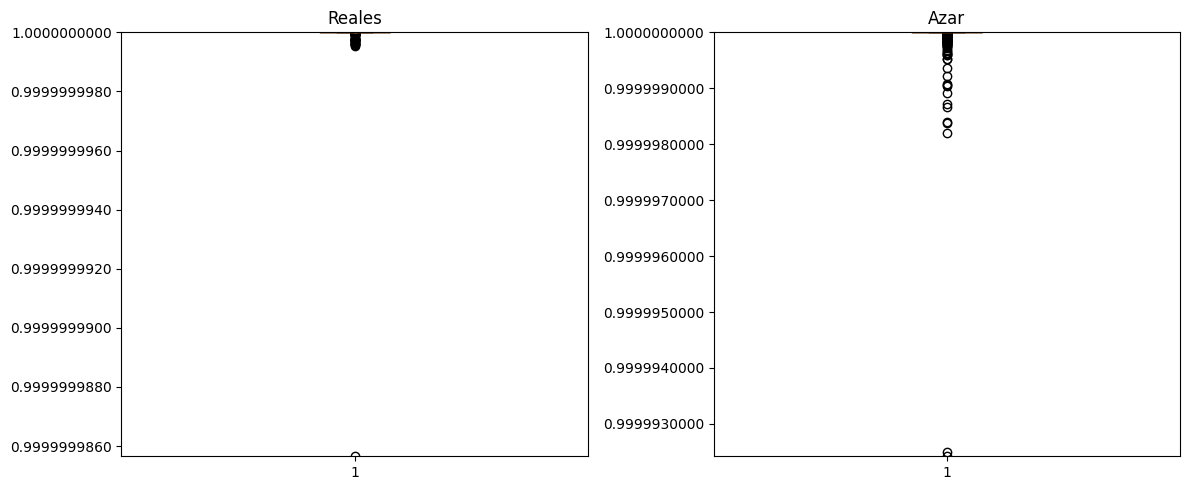

In [31]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot Reales
axes[0].boxplot(chi_cuadrado_reales)
axes[0].set_title("Reales")
axes[0].set_ylim(min(chi_cuadrado_reales), max(chi_cuadrado_reales))
axes[0].set_title("Reales")
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.10f}"))


# Boxplot Aleatorias
axes[1].boxplot(chi_cuadrado_azar)
axes[1].set_title("Azar")
axes[1].set_ylim(min(chi_cuadrado_azar), max(chi_cuadrado_azar))
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.10f}"))


plt.tight_layout()
plt.show()

## Metrica de Error Cuadratico Medio

In [32]:
def dif_listas(a,b):
  return[x - y for x, y in zip(a, b)]

ECM_reales = []
ECM_azar = []

for glob in globinas:
  #ECM de la Globina (Real)
        obs_real = np.array(frecuencias_ordenadas(glob))
        obs_real = ajustar_dist(obs_real)

        ECM_real = metrica(obs_real, distribucion_globinas, "ECM")
        ECM_reales.append(ECM_real)

  #ECM de la secuencia aleatoria (mismo largo que la Globina)
        prot_azar = proteina_azar( len(glob))
        obs_azar = np.array(frecuencias_ordenadas(prot_azar))
        obs_azar = ajustar_dist(obs_azar)

        ECM_aleatorio = metrica(obs_azar, distribucion_globinas, "ECM")
        ECM_azar.append(ECM_aleatorio)




## ECM resultantes

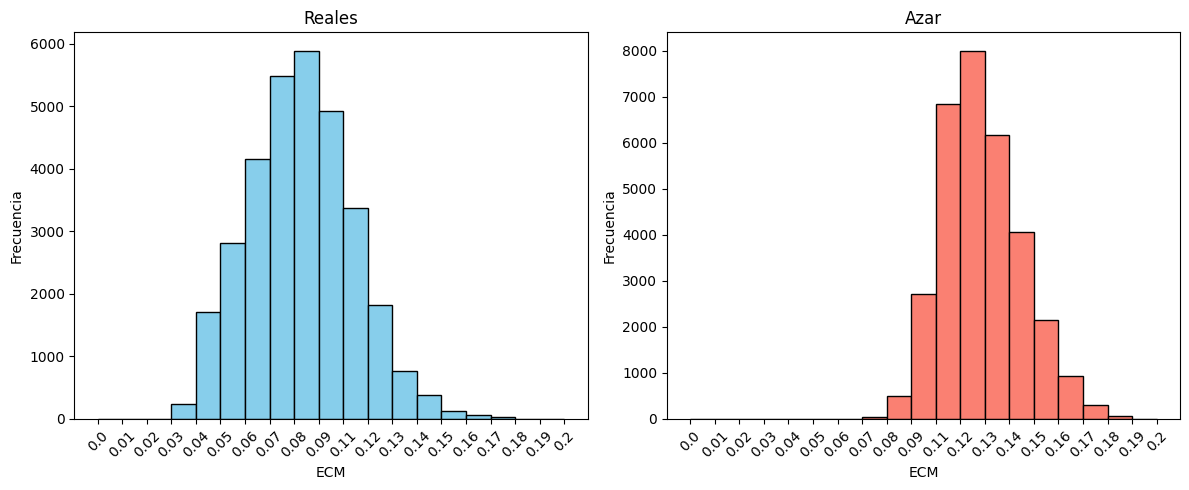

0.8452564384767774
0.8160749661960316
[71, 72, 72, 74, 75, 75, 76, 79, 79, 79, 81, 81, 81, 81, 83, 85, 85, 86, 86, 89, 89, 90, 90, 93, 94, 94, 94, 95, 96, 96, 96, 96, 96, 96, 97, 97, 98, 98, 99, 100, 100, 100, 100, 101, 101, 101, 101, 101, 102, 102, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 109, 109, 

In [33]:
bins = np.linspace(0, 0.20, 20)  # 20 bins
ticks = np.round(bins,2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer histograma (Reales)
axes[0].hist(ECM_reales, bins=bins, color="skyblue", edgecolor="black")
axes[0].set_title("Reales")
axes[0].set_xlabel("ECM")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xticks(bins)
axes[0].set_xticklabels(ticks, rotation = 45)

# Segundo histograma (Azar)
axes[1].hist(ECM_azar, bins=bins, color="salmon", edgecolor="black")
axes[1].set_title("Azar")
axes[1].set_xlabel("ECM")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xticks(bins)
axes[1].set_xticklabels(ticks, rotation = 45)

plt.tight_layout()
plt.show()

umbral = 0.11
print(sum([1  for a in ECM_reales if a < umbral])/ len(ECM_reales))

print(sum([1  for a in ECM_azar if a > umbral])/ len(ECM_azar))

i) ver como evoluciona las distribuciones obtenidas en 4A al aumentar el tamaño de la
muestra (Evaluar cuando la distribución deja de cambiar).

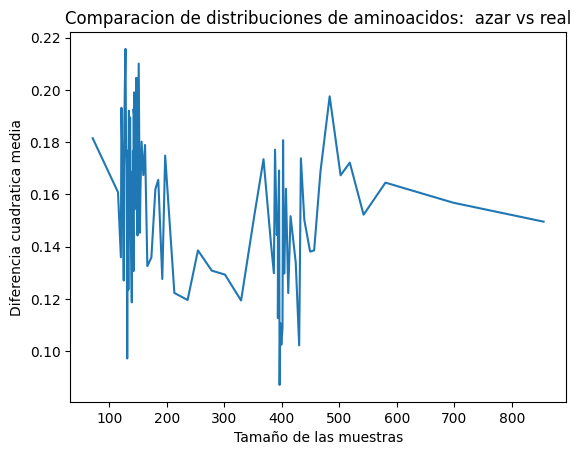

In [87]:
#Iteramos sobre el tamaño de la muestras comparando distribuciones
random.seed(3)

globinas = sorted(globinas, key = len)
indices_muestras = list(range(0,len(globinas), 350))
indices_muestras = [int(a) for a in indices_muestras]
tamanios_muestras = [len(globinas[indice]) for indice in indices_muestras]

resultados = []
for indice in indices_muestras:
  proteina_real = globinas[indice]
  fr_real = np.array(frecuencias_ordenadas(proteina_real))
  fr_real = ajustar_dist(fr_real)

  prot_azar = proteina_azar( len(proteina_real))
  fr_azar = np.array(frecuencias_ordenadas(prot_azar))
  fr_azar = ajustar_dist(fr_azar)

  ECM = metrica(fr_azar, fr_real, "ECM")
  resultados.append(ECM)

plt.plot(tamanios_muestras, resultados)
plt.xlabel("Tamaño de las muestras")
plt.title("Comparacion de distribuciones de aminoacidos:  azar vs real")
plt.ylabel("Diferencia cuadratica media")
plt.show()

Podemos observar como las distribuciones de aminoacidos varian en mucha menor medida a partir de muestras de tamaño 150 aproximadamente, y el error se mantiene entre 0.01 y 0.02

ii) estudiar de manera sistemática las diferencias entre las distribuciones obtenidas en 4a
para diferentes muestras (comparar distribuciones de secuencias naturales y al azar).

El tamaño de la proteina Q8FZJ5 es de 172
El tamaño de la proteina Q9BZQ8 es de 928
El tamaño de la proteina Q8GTG2 es de 55
El tamaño de la proteina P02647 es de 267
El tamaño de la proteina Q9N4W9 es de 85
El tamaño de la proteina P83151 es de 20
El tamaño de la proteina P48592 es de 393

El tamaño de la proteina P00533 es de 1210
El tamaño de la proteina P28482 es de 360
El tamaño de la proteina P06493 es de 297
El tamaño de la proteina P31749 es de 480
El tamaño de la proteina P12931 es de 536


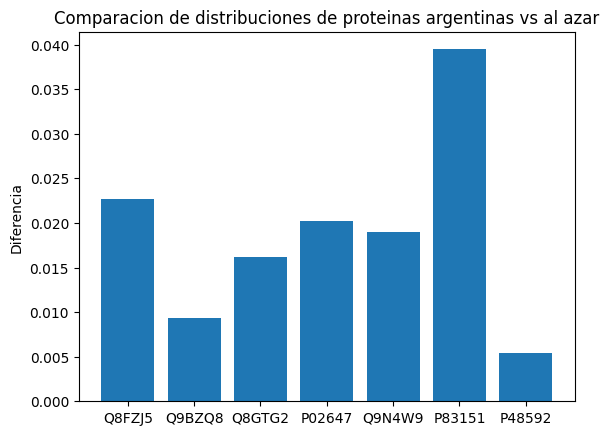

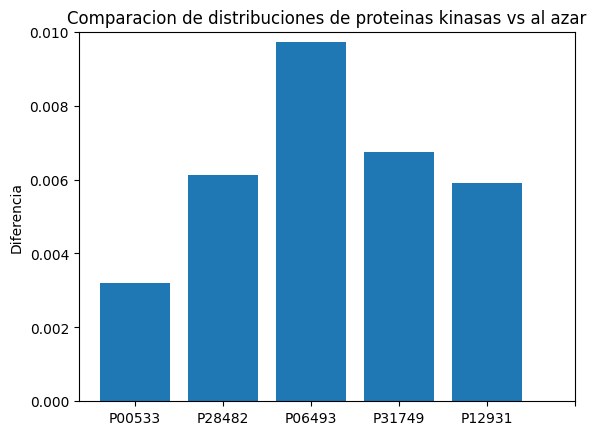

In [ ]:
#Obtenemos proteinas kinasas y argentinas para hacer la comparacion

proteinas_arg = obtener_secuencias(proteinas_argentina, 'protein')
proteinas_kin = ['P00533', 'P28482','P06493', 'P31749', 'P12931']
proteinas_kinasas = obtener_secuencias(proteinas_kin, 'protein')

promedios_arg = []
i = 0
for proteina in proteinas_arg:
    diferencias, promedio = comparar_distribuciones(proteina, len(proteina))
    print( f"El tamaño de la proteina {proteinas_argentina[i] } es de {len(proteina)}")
    promedios_arg.append(promedio)
    i = i + 1
print()
promedios_kin = []
i = 0
for proteina in proteinas_kinasas:
    diferencias, promedio = comparar_distribuciones(proteina, len(proteina))
    print( f"El tamaño de la proteina {proteinas_kin[i] } es de {len(proteina)}")
    promedios_kin.append(promedio)
    i = i + 1

plt.bar(proteinas_argentina,promedios_arg)
plt.title("Comparacion de distribuciones de proteinas argentinas vs al azar")
plt.xticks([0,1,2,3,4,5,6])
plt.ylabel("Diferencia")
plt.show()

plt.bar(proteinas_kin,promedios_kin)
plt.title("Comparacion de distribuciones de proteinas kinasas vs al azar")
plt.xticks([0,1,2,3,4,5])
plt.ylabel("Diferencia")
plt.ylim(0,0.01)
plt.show()



Podemos concluir de los dos graficos de barras anteriores que la diferencia de distribuciones entre proteinas reales y al azar disminuye a medida que aumenta el tamaño de la muestra.

Asi es como el error cuadratico medio de las kinasas ( que son mas largas que las proteinas argentinas en el mayor de los casos) no supera el 0.01; mientras que las argentinas superan dicho umbral en muchas ocasiones.

# 4 E)Detector de ORFs.

## i) levante una secuencia de ADN

In [ ]:
def levantar_ADN(posicion):
    ADN = [ids_genbank_argentina[posicion]]
    ADN = Seq(obtener_secuencias(ADN, 'nucleotide')[0])
    return(ADN)

## ii) Obtenga los 6 marcos de lectura posibles y determine los ORFs de cada uno de ellos. (3 marcos de lectura para la secuencia de ADN y su secuencia reversa complementaria) (ORFs....region entre un codon de comienzo y de fin)

In [ ]:
ADN = levantar_ADN(6)
obtener_ORFs(ADN)

/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


([[],
  [],
  [],
  [Seq('MVRLVLRPYTQIRRSICTSEPLRTSIRVSSDFVLFRHSSPSFGSQSVRSDSTTE...NRQ'),
   Seq('MQNACIVQKQLKTAHPSAYISNLTIKLDCHPHAKVSKRVWSSSQASNSVLE')],
  [],
  []],
 [[], [], [], [91, 51], [], []])

## iii) Para cada ORF determine a) la longitud del mismo y b) la distribución de aminoácidos.

In [ ]:
#Un ejemplo de output para una secuencia al azar
secuencia_azar = ADN
ORFs_a, largos_ORF_a = obtener_ORFs(secuencia_azar)
for i in range(len(largos_ORF_a)):
      print(f"Para el marco {i} hay {len(largos_ORF_a[i])} ORFs de largo promedio {np.average(largos_ORF_a[i])}")
print(ORFs_a)

Para el marco 0 hay 0 ORFs de largo promedio nan
Para el marco 1 hay 0 ORFs de largo promedio nan
Para el marco 2 hay 0 ORFs de largo promedio nan
Para el marco 3 hay 2 ORFs de largo promedio 71.0
Para el marco 4 hay 0 ORFs de largo promedio nan
Para el marco 5 hay 0 ORFs de largo promedio nan
[[], [], [], [Seq('MVRLVLRPYTQIRRSICTSEPLRTSIRVSSDFVLFRHSSPSFGSQSVRSDSTTE...NRQ'), Seq('MQNACIVQKQLKTAHPSAYISNLTIKLDCHPHAKVSKRVWSSSQASNSVLE')], [], []]


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


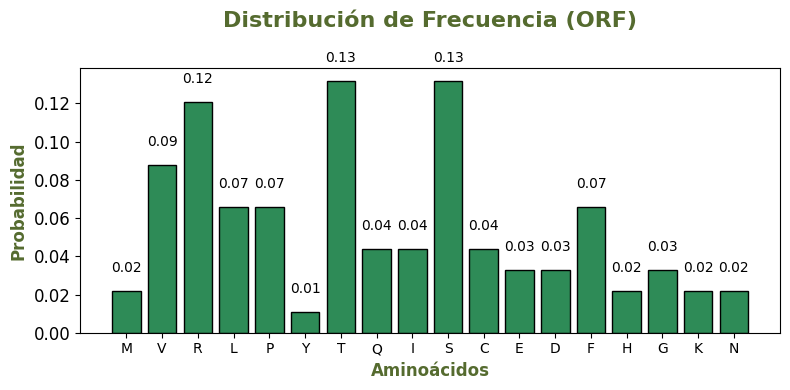

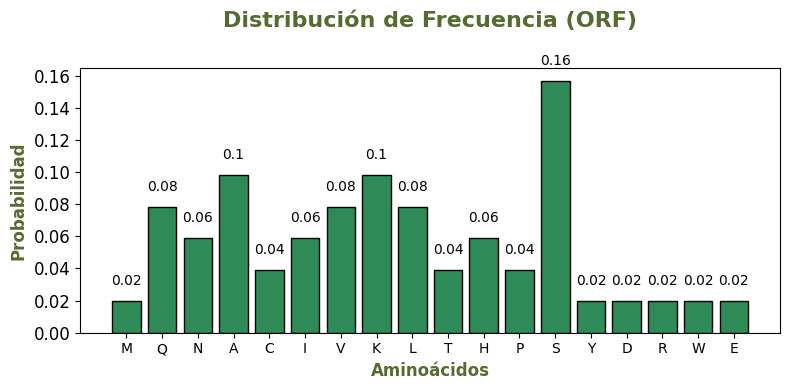

In [ ]:
for ORF in ORFs_a:
  if len(ORF) != 0:
    for secuencia in ORF:
      distribucion_aminoacidos = frecuencia(secuencia)
      graficar_frecuencia(distribucion_aminoacidos, "ORF")
  else:
    pass

ORFs_ = [sec for sublista in ORFs_a for sec in sublista]


## iv) En base a lo analizado previamente determine a partir del largo y la distribución una probabilidad de corresponder (o no) a una región codificante.

{'A': 0.2503242542153048, 'C': 0.1828793774319066, 'G': 0.2775616083009079, 'T': 0.2853437094682231, 'Y': 0.0025940337224383916, 'R': 0.0012970168612191958}


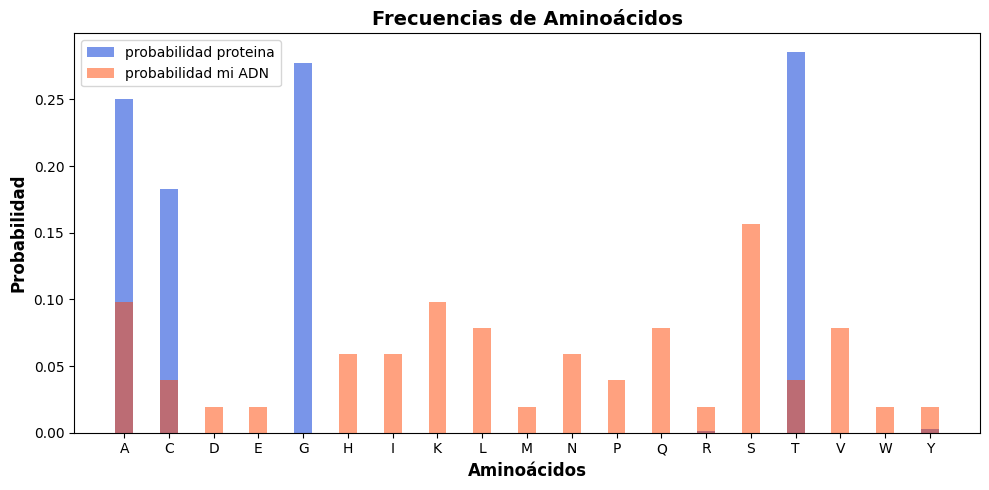

In [ ]:
# Obtenemos la secuencia de proteina al azar
proteina_real = levantar_ADN(6)
probabilidades_proteina_real = frecuencia(proteina_real)

print(probabilidades_proteina_real)

probabilidades_ADN= frecuencia(ORFs_[1])

graficar_frecuencias_superpuestas(probabilidades_proteina_real,
                                  probabilidades_ADN,
                                  label1="probabilidad proteina", label2="probabilidad mi ADN", titulo="Frecuencias de Aminoácidos")


In [ ]:
largos_ORF = [len(sec) for sublista in ORFs_a if sublista for sec in sublista]

#Lo que haremos para detectar regiones codificantes es:
### Tomar una muestra de proteinas reales y obtener de ellas primero la distribucion de aminoacidos y luego la de los largos de los ORFs.
###Definir una funcion que obtenga por cada marco de lectura la distribucion de aminoacidos y largos de ORFs de una secuencia de ADN.
### Finalmente calcular una probabilidad de ser o no una region codificante para cada uno de los marcos de lectura de la secuencia de adn a comparar.


#Obtencion distribucion de aminoacidos de proteinas reales

In [ ]:

lista_actinas_proteinas = [ 'P63267','P42768', 'P68032', 'P60709', 'P63261', 'P68133']
lista_queratinas_proteinas = [ 'Q9NSB2', 'Q9BYQ5', 'Q9BYQ6', 'P35908', 'P60410', 'P60411']
hemoglobinas_ubiquitinas = ['P68871','P69905','P0CG47', 'P0CG48', 'P62987', 'P62979',"P01308","Q9Y6K9",  "P38398","Q9Y243","P01106"
                                "P04637",  "Q9Y6M1",  "Q9Y6R7", "P00533", "P07900" ]

lista_secuencias_proteinas_reales =[ obtener_secuencias(ids_genbank_argentina, 'protein'),
                              obtener_secuencias(lista_actinas_proteinas, 'protein'),
                               obtener_secuencias(lista_queratinas_proteinas, 'protein'),
                                obtener_secuencias(hemoglobinas_ubiquitinas ,'protein')
                               ]

gran_proteina = " ".join([str(elemento) for sublista in lista_secuencias_proteinas_reales for elemento in sublista])
gran_proteina = gran_proteina.replace(" ","")
frecuencia_reales = frecuencia(gran_proteina)


# Obtencion de la distribucion de los largos de los ORFs de proteinas reales

In [ ]:

#Funcion auxiliar que  dada una lista del estilo [  [a,b,c], [d,e,f]  ] devuelve [a,b,c,d,e,f]
def enlist(listas):
    ret = []
    for lista in listas:
          for elem in lista:
             ret.append(elem)
    return(ret)


largos_ORFs_reales = []
ORFs_reales = []
for lista_secuencias in lista_secuencias_adn_reales: #Para cada familia de proteinas
    for secuencia in lista_secuencias: #Para cada secuencia de adn
            if secuencia:
                ORF, largos_ORF = obtener_ORFs(secuencia)  #Para cada marco de lectura obtenemos las secuencias y los largos
                lista = enlist(largos_ORF) #Lista con los largos de todos los posibles ORFs de todos los marcos
                ORFs_reales.append(ORF)
                if lista: largos_ORFs_reales.append(max(lista)) #Si no esta vacia, me quedo con el de maximo largo
                #Es logico pensar que el ORF mas probable sea el mas largo, otros mas cortos pueden darse
                #por metioninas que son parte de la region codificante, sin funcionar como codon start, sino como un aminoacido mas de la secuencia proteica

#Identificamos los valores mas largos y los colocamos en un mismo bin
outliers = sum([1 for x in largos_ORFs_reales if x >=120])/len(largos_ORFs_reales)
print(f" Los valores representados en el ultimo bin del histograma son: {[x for x in largos_ORFs_reales if x >=120]}")

conteos, bordes = np.histogram(largos_ORFs_reales, bins=np.arange(0,180,20))  #Creamos los intervalos y calculamos la cantidad de ORFs en ellos para graficarlos en el histograma
frecuencias_largos_ORFS_reales = np.append([f/len(largos_ORFs_reales) for f in conteos], np.array(outliers))
centros = 0.5 * (bordes[:-1] + bordes[1:])
anchos = np.diff(bordes)

plt.bar(np.append(centros,170) ,frecuencias_largos_ORFS_reales , width=np.append(anchos,20) , align='center', edgecolor='black')
plt.xlabel("Cantidad de aminoacidos")
plt.xticks(ticks =np.arange(0,180,20) )
plt.ylabel("Frecuencias")
plt.title("Frecuencias de las longitudes de los ORF de proteinas reales")
plt.show()




/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:1612: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. This may become an error in future.
  warnings.warn(


UndefinedSequenceError: Sequence content is undefined

 Los valores representados en el histograma son: [1255, 1255]


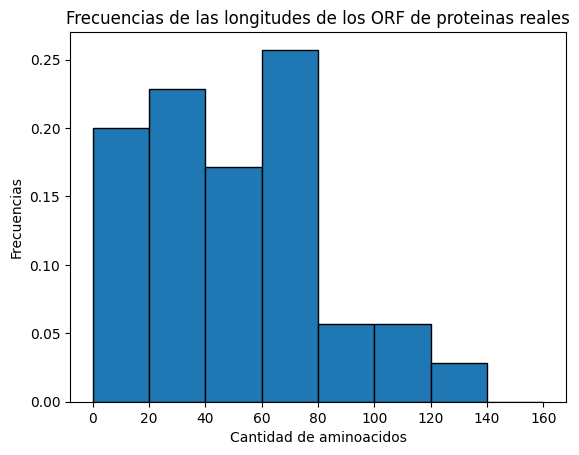

37

In [ ]:

#Graficamos la distribucion de los largos de los ORFs
print(f" Los valores representados en el histograma son: {[x for x in largos_ORFs_reales if x >=180]}")
conteos, bordes = np.histogram(largos_ORFs_reales, bins=np.arange(0,180,20))
frecuencias_largos_ORFS_reales = [f/len([x for x in largos_ORFs_reales if x<180]) for f in conteos]
centros = 0.5 * (bordes[:-1] + bordes[1:])
anchos = np.diff(bordes)
centros_ = []
plt.bar(centros, frecuencias_largos_ORFS_reales, width=anchos, align='center', edgecolor='black')
plt.xlabel("Cantidad de aminoacidos")
plt.xticks(ticks = np.arange(0,180,20))
plt.ylabel("Frecuencias")
plt.title("Frecuencias de las longitudes de los ORF de proteinas reales")
plt.show()
len(largos_ORFs_reales)

# Funcion que obtiene distribucion de aminoacidos y largos de ORFs dada una secuencia de ADN

In [ ]:
#El resultado son dos listas, donde distribuciones_posibles_aa tiene las seis posibles distribuciones de aminoacidos (por cada marco),
#                                 y  distribuciones_posibles_largos_ORFs las seis posibles para los largos de los ORFs
def obtener_dist(adn):
    i = 1
    ORFs_n, largos_ORF_n = obtener_ORFs(adn)

    distribuciones_posibles_aa =[]
    for marco in ORFs_n: #Dado un posible marco de lectura
        prot = (" ".join([str(orf) for orf in marco])) #Dados todos los ORFs creo una unica secuencia de la cual calculo la distribucion
        prot = prot.replace(" ","")
        contador = Counter(prot)
        freq = {letra: contador[letra] / len(prot) for letra in contador} #Diccionario de frecuencias
        distribuciones_posibles_aa.append(freq)
        i += 1

     #Ahora calculamos los bins para los largos de los ORFs del ADN dado
    distribuciones_posibles_largos_ORFs = []
    for marco in largos_ORF_n: #Para cada   #Dado un posible marco de lectura
         conteos_n, bordes_n = np.histogram(marco, bins=np.arange(0,180,20)) #Creo histograma de los largos de los ORFs de este marco
         frecuencias_largos_ORFS_n = []
         if(len(marco) >0):
             outliers_n = sum([1 for x in marco if x >=180])/len(marco)
             frecuencias_largos_ORFS_n = np.append([f/len(marco) for f in conteos_n], np.array(outliers_n)) #Creo listas de frecuencias por bins
         distribuciones_posibles_largos_ORFs.append(frecuencias_largos_ORFS_n)
    return(distribuciones_posibles_aa , distribuciones_posibles_largos_ORFs)

#obtener_dist(ADN)

# Definimos la funcion que calcula una probabilidad de ser o no una region codificante para cada uno de los marcos de lectura, dada una secuencia de adn a comparar.

In [ ]:
#Dadas 2 distribuciones (aminoacidos o largos de ORFs) de n bins, tomamos como peor caso cuando cada distribucion tiene frecuencia 1 en bins distintos.
#Por lo tanto el peor error es 2/n, y normalizamos entre 0 y 1 para interpretar mejor la metrica.
#Funcion auxiliar que evitar comparar/operar con objetos nulos
def no_nulo(l):
    if(type(l) == dict):
          for key in l.keys():
              if l[key] > 0: return(True)
    if(type(l) == list):
        for valor in l:
            if valor!=np.isnan(valor): return(True)
    return(False)

def es_region_codificante(distribucion_aminoacidos, distribuciones_largos_ORFs):
    mejor_marco = [-1,-1]fasta_path = "proteinas.fasta"

# Leer secuencias
secuencias = []
for record in SeqIO.parse(fasta_path, "fasta"):
    secuencias.append(str(record.seq))
    probas = []
    for i in range(1,7):
        dif_cuadratica_bins, promedio = diferencia_cuadratica_media(distribucion_aminoacidos[i-1],frecuencia_reales) # Comparo distribucion aminoacidos
        if(len(distribuciones_largos_ORFs[i-1]) == 0): promedio, promedio_ = 1, 1 #Sin marco abierto de lectura no hay proteina, lo descarto por completo.
        else:
              promedio_ = comparar_distribuciones_listas(distribuciones_largos_ORFs[i-1], frecuencias_largos_ORFS_reales) #Comparo distribucion largos de ORFs
        proba = 1 -  0.6 * promedio - 0.4 * promedio_  #La probabilidad la pensamos inversa a un promedio pesado de los tipos de errores (menor error, mayor probabilidad)
        probas.append(proba)
        mejor_proba = max([x for x in probas if not np.isnan(x) ])
    return( mejor_proba  > 0.7,[mejor_proba,probas.index(mejor_proba)+1] ) #Devuelve tupla: si la consideramos region codificante,
                                                                            #lista con mejor probabilidad e indice de marco de lectura donde obtuvimos dicha probabilidad


#Control positivo

In [ ]:
control_positivo = levantar_ADN(6) #Encontramos los 6 marcos de lectura de una secuencia de ADN que sabemos que codifica para una proteina, esperando que devuelva que es codificante

dist_aa_adn, dist_largos_adn = obtener_dist(control_positivo)
resultado,marco = es_region_codificante(dist_aa_adn,dist_largos_adn)
if(resultado): print(f"Es region codificante con probabilidad {marco[0]} para el marco de lectura {marco[1]}")
else: print("No es region codificante")



Es region codificante con probabilidad 0.9021147491592869 para el marco de lectura 4


#Control negativo

In [ ]:
random.seed(40)
tamanios = np.arange(10,500,10)
resultados = []
for s in tamanios: #Generamos controles negativos de distintos tamaños y probamos con todos, esperando que devuelva que no es codificante para cada una
    control_negativo = Seq(adn_azar(s*3))
    ORFs_n, largos_ORF_n = obtener_dist(control_negativo)
    control_negativo_resultado, marco = es_region_codificante(ORFs_n, largos_ORF_n)
    resultados.append(control_negativo_resultado)
fasta_path = "proteinas.fasta"

# Leer secuencias
secuencias = []
for record in SeqIO.parse(fasta_path, "fasta"):
    secuencias.append(str(record.seq))
acierto = (len(resultados) - sum(resultados))/ len(resultados)
print(f"Acertamos en {acierto} controles negativos ")

Acertamos en 0.3877551020408163 controles negativos 


¿Qué modificaciones podría agregar para mejorar su capacidad predictiva?

Observamos un porcentaje de aciertos de 38,7%. No es un buen detector de regiones codificantes, creemos que puede mejorar aumentando el numero y tipo de proteinas con las cuales tomamos las frecuencias de referencia (tanto para la distribucion de aminoacidos como para la de los largos de los ORFs).
Como hay 20 aminoacidos, obtener una distribucion precisa para cada uno requiere contar con mas proteinas.
Ademas usamos la misma metrica para proteinas de distinto tamaño, cuando podriamos obtener distintas distribuciones para distintos largos (intuimos que es logico a nivel biologico).

Obtenga de alguna base de datos de secuencias genómicas la secuencia de un gen eucariota completo
y corra su programa.

Usaremos el gen TP53 (tumor protein p53)

In [ ]:
Entrez.email = "joaquinsalva03@gmail.com"

handle = Entrez.efetch(
    db="nucleotide",
    id="NC_000017.11",
    rettype="gb",
    retmode="text",
    strand=1,
    seq_start=7668402,
    seq_stop= 7687550
)

record = SeqIO.read(handle, "genbank")
handle.close()

regiones_codificantes = []
regiones_sin_repetidos = []
for feature in record.features:
    if feature.type == "CDS": #Extraemos las regiones anotadas como codificantes en la base de datos
        seq_region = feature.location.extract(record.seq)
        regiones_codificantes.append(seq_region)
        regiones_sin_repetidos.append(str(seq_region))
contador  = Counter(regiones_sin_repetidos) #Creamos un diccionario con las apariciones de cada secuencia para detectar repeticiones y probar nuestro programa en secuencias sin repetidos.

print(f"El gen tiene {len(regiones_codificantes)} regiones codificantes con {len(contador.keys())} secuencias sin repetidos")

resultados = []
for region in regiones_sin_repetidos:
    dist_aa_rc, dist_largos_rc = obtener_dist(Seq(region)) #Obtenemos las dos distribuciones de interes de la region
    resultado, marco = es_region_codificante(dist_aa_rc, dist_largos_rc) #Ejecutamos la funcion que clasifica regiones
    resultados.append(resultado)

acierto =sum(resultados)/ len(resultados) #En resultados los booleanos True suman 1, False 0. Deberian ser todos True.
print(f"Acertamos en un {100 *acierto} por ciento de las  regiones codificantes ")

El gen tiene 25 regiones codificantes con 12 secuencias sin repetidos
Acertamos en un 100.0 por ciento de las  regiones codificantes 


Podemos concluir que nuestra funcion suele arrojar probabilidades altas, independientemente de si se trata de una proteina real o un una al azar.
Esto se puede deber a que no capta con precision las distribuciones de aminoacidos y largos de ORFs en proteinas reales, entonces las distribuciones que tomamos como referencia son similares a aquellas de secuencias al azar.
Es poco sensible a secuencias aleatorias, podriamos definir numerosas secuencias al azar, obtener una distribucion promedio de ellas y en la funcion es_region_codificante penalizar la probabilidad si la secuencia a comparar tiene distribuciones similares a la aleatoria promedio.  